# ML Course 2 - Practice

## Subject

We provide here a data set on the customers of a bank:
- CustomerId = customer id in the information system of the bank
- Surname = surname of the customer
- CreditScore = score attributed by the bank as estimation of capacity to reimburse a loan
- Geography = country of the customer
- Gender = sex of the customer
- Age = age of the customer
- Tenure = loan duration (year)
- Balance = amount of money on main account (\$)
- NumOfProducts = number of products the customer has in the banl
- HasCrCard = tells if the customer owns a credit card
- IsActiveMember = tells if the customer has an active account
- EstimatedSalary = estimated salary of the customer (\$)
- Exited = tells if the customer has left the bank

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder 
import seaborn as sns

In [13]:
dataset_raw = pd.read_csv('bank_churn.csv')
dataset_raw.sample(n=10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3360,3361,15726796,Brabyn,844,France,Male,38,7,111501.66,1,1,1,119333.38,0
2355,2356,15710366,Hamilton,569,Spain,Female,42,1,0.00,1,1,1,83629.60,1
8482,8483,15756655,Madukaife,632,France,Female,34,2,0.00,2,0,0,165385.55,0
1929,1930,15623791,Padovesi,632,Spain,Female,40,3,109740.62,1,1,0,141896.74,0
4798,4799,15627377,Sabbatini,593,France,Male,41,6,0.00,2,1,1,99136.49,0
9008,9009,15776936,Whitworth,475,France,Male,40,7,160818.08,1,0,1,169642.13,1
1493,1494,15686963,Hardiman,680,Spain,Female,30,3,0.00,1,1,0,160131.58,0
5270,5271,15607230,Michel,588,Germany,Male,33,9,150186.22,2,1,1,65611.01,0
8980,8981,15786433,Aitken,650,Germany,Female,35,3,165982.43,2,1,1,24482.16,0
2360,2361,15670205,Boyd,518,Germany,Female,41,5,110624.99,1,1,0,89327.67,0


The objective of the bank is to predict the churn, i.e. if a customer is likely to leave the bank, based on his/her profile (estimated salary, geography, age, etc.).
Here, we will prepare the data set so that it can be directly used for ML processing. The work is limited to data exploration and preparation, we will not make ML prediction yet.

Your tasks:
- Make some data exploration with at least three plots of your choice. Choose plots that provide interesting and meaningful information. 
Examples: distribution of the values within one feature, repartition of a feature depending on the target value, etc.  
For each graph, you must:
    - Plot the graph
    - Povide a title, axis labels and legend if applicable
    - Write a Markdown cell underneath to explain what insights you can draw from your graph. 
- Prepare the data set. Example: dropping irrelevant data, preparing the predictors and the response, data encoding, train/test split, data scaling.
    - Explain why you drop a features
    - Explain your choice of encoding
   
Bonus: Feature Engineering!  
Enrich the dataset by creating new features for your model to learn on. It can be a combination of other features or combining with external information.

        Exploratory Data Analysis

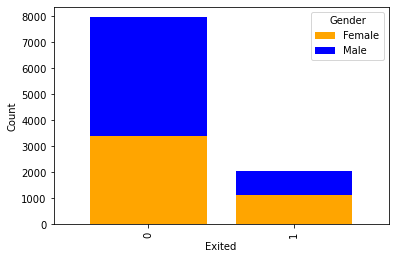

In [6]:
df_plot = dataset_raw.groupby(['Exited','Gender']).size().unstack().plot(kind='bar',
                                                                    stacked=True, color=['orange', 'blue'], width=0.8)
plt.ylabel('Count')
plt.show()

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

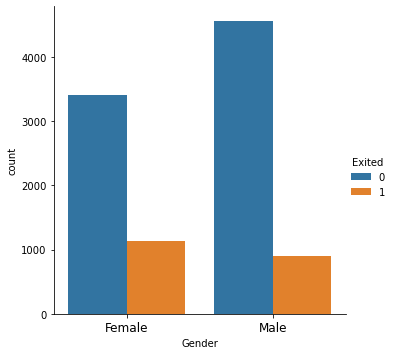

In [28]:
ax=sns.catplot(x ="Gender", hue ="Exited",
kind ="count", data = dataset_raw)


the above Bar chats shows that, there are more male customers and female customers are more likely to stay at churn  bank 
than males customers

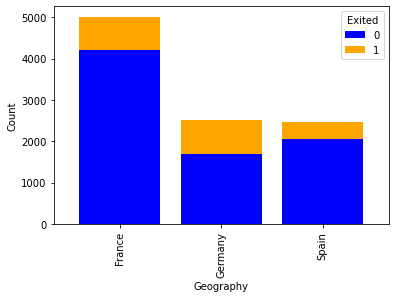

In [31]:
df_plot = dataset_raw.groupby(['Geography','Exited']).size().unstack().plot(kind='bar',
                                                                    stacked=True, color=['blue', 'orange'], width=0.8)
plt.ylabel('Count')
plt.show()

The above  bar chart shows customers by Geography; France has the most customers, 
followed by Spain with a small difference than Germany.  In terms of churn, Germany has the highest customers that churned, 
while Spain has the least.spain has the least  of customer who left. 

<AxesSubplot:>

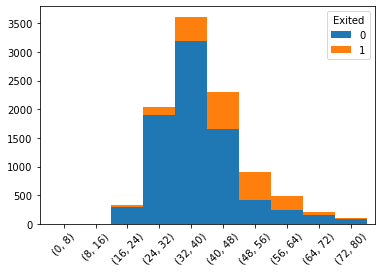

In [55]:
def hist(x):
    h, e = np.histogram(x.dropna(), range=(0, 80))
    e = e.astype(int)
    return pd.Series(h, zip(e[:-1], e[1:]))

kw = dict(stacked=True, width=1, rot=45)
dataset_raw.groupby('Exited').Age.apply(hist).unstack(0).plot.bar(**kw)


Text(0.5, 1.0, 'Not Exited')

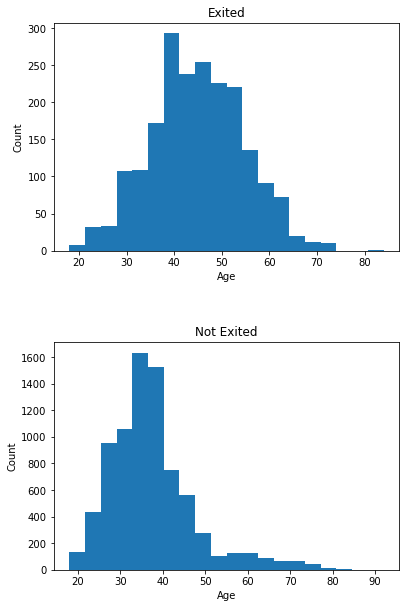

In [62]:
x1 = plt.subplot(211)
plt.hist(dataset_raw[dataset_raw['Exited']==1]['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Exited')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=2.0, 
                    wspace=0.4, 
                    hspace=0.4)

ax2 = plt.subplot(212)
plt.hist(dataset_raw[dataset_raw['Exited']==0]['Age'],bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Not Exited')

In terms of age, the histogram shows, most of the customers are between the ages 30 to 40 years, 
whilst the least customers are over 70+ years. the bank doesnt have customer from 0 to 16.The highest churn is between the ages of 40 to 50 years, 
and the least churn is at the extreme ages of  20 to 30 years and 70+ years. There are few customers that are 90+ years that churned.

Text(0.5, 1.0, 'Not Exited')

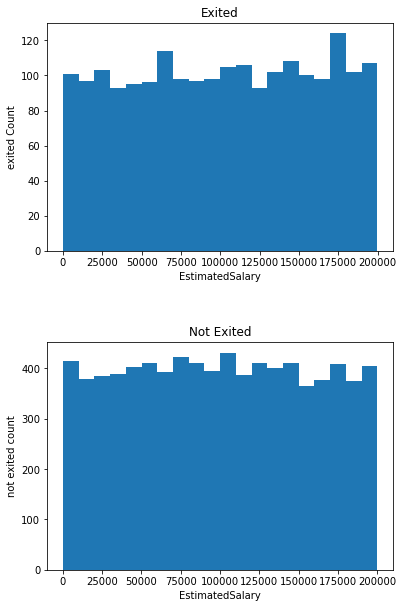

In [61]:
ax1 = plt.subplot(211)
plt.hist(dataset_raw[dataset_raw['Exited']==1]['EstimatedSalary'], bins=20)
plt.xlabel('EstimatedSalary')
plt.ylabel('exited Count')
plt.title('Exited')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=2.0, 
                    wspace=0.4, 
                    hspace=0.4)

ax2 = plt.subplot(212)
plt.hist(dataset_raw[dataset_raw['Exited']==0]['EstimatedSalary'],bins=20)
plt.xlabel('EstimatedSalary')
plt.ylabel('not exited count')
plt.title('Not Exited')

customers with salary range 175 000 are likely to exit the bank

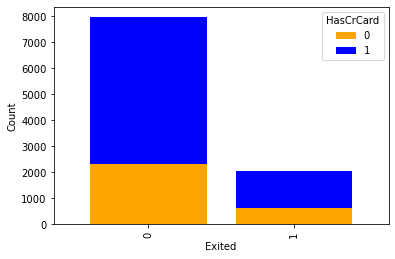

In [66]:
creditcard_vs_exited = dataset_raw.groupby(['Exited','HasCrCard']).size().unstack().plot(kind='bar',
                                                                    stacked=True, color=['orange', 'blue'], width=0.8)
plt.ylabel('Count')
plt.show()

the above bar graph shows that many customer have no  credit card,those who are without are likely to leave the bank.

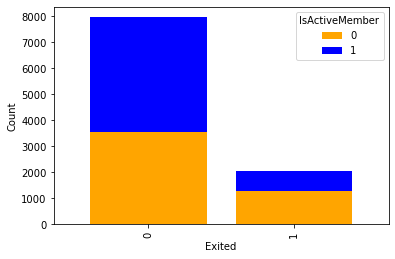

In [65]:
df_plot = dataset_raw.groupby(['Exited','IsActiveMember']).size().unstack().plot(kind='bar',
                                                                    stacked=True, color=['orange', 'blue'], width=0.8)
plt.ylabel('Count')
plt.show()

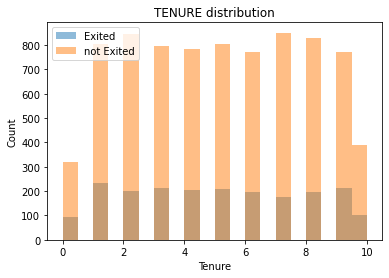

In [72]:
plt.hist(dataset_raw[dataset_raw['Exited'] == 1]['Tenure'], alpha=0.5, label="Exited", bins=20)
plt.hist(dataset_raw[dataset_raw['Exited'] == 0]['Tenure'], alpha=0.5, label="not Exited", bins=20)
plt.title("TENURE distribution")
plt.ylabel("Count")
plt.xlabel("Tenure")
plt.legend()
plt.show()

In [ ]:
The bar chart shows that, there are more active customers and inactive customers are more likely to churn. 
From the histogram, more customers are within  2 to 9 months tenure range and the least customers have a 10 months tenure. 
The highest churn is by customers that are less than two months tenure and 
the least churn are customers with  10 months tenure

Text(0.5, 1.0, 'Exited')

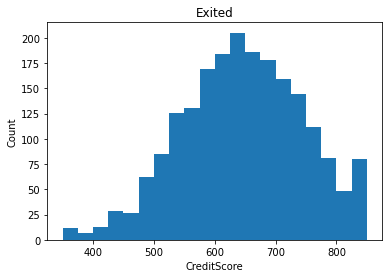

In [67]:
plt.hist(dataset_raw[dataset_raw['Exited']==1]['CreditScore'], bins=20)
plt.xlabel('CreditScore')
plt.ylabel('Count')
plt.title('Exited')

Key findings in this project are: long tenure customers 
    are less likely to churn, in active customers are more likely to churn,
    customers with zero balance are more likely to churn, female customers are more likely to churn, 
    age is the strongest features to predict churn, 
    customers with three or four products are less likely to churn , 
    older customers above 60 years are less likely to Churn and 
    those  young customers between 40 to 50 years are more likely to churn.

                              Dataset and preprocessing

For "Age" column, first plot histogram to see the skewness of the distribution.it looks like ita right skewed,so the best way to fill missing values might be using   the medim instead of mean 

<AxesSubplot:ylabel='Frequency'>

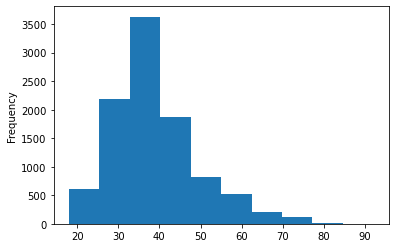

In [17]:
dataset_raw['Age'].plot(kind='hist')

Dataset and preprocessing

checking the important information about the data

checking if there is any NaN value or not in our DataSet.Check if dataset has missing values, and fill missing values.fom below we can see that there are no missing values

In [74]:
dataset_raw.isnull().sum()

RowNumber          0
CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

checking the important information about the data

checking  if there is any NaN value   or not in our DataSet.Check if dataset has missing values, and fill missing values.

In [15]:
dataset_raw.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [75]:
dataset_raw.shape

(10000, 13)

In [76]:
dataset_raw.dtypes

RowNumber            int64
CustomerId           int64
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [77]:
dataset_raw.shape

(10000, 13)

In [19]:
dataset_raw['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [20]:
dataset_raw['Gender'].unique()

array(['Female', 'Male'], dtype=object)

Drop the columns that will not be used for modeling.I dropped irrelevant variables(Row number, Customer Id and Surname),since they where unnecessary for my model

In [89]:
dataset = dataset_raw.drop(['RowNumber','CustomerId'], axis = 1)
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [90]:
duplicate_dataset = dataset.drop_duplicates()
duplicate_dataset.duplicated().sum()

0

In [97]:
y = dataset.iloc[:, -1]
x = dataset.iloc[:, 0:-2]

In [98]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
x['Gender'] = label_encoder.fit_transform(x['Gender'])

why label encoder?
label encoder convert the labels into the integer format, 
the machine learning model can have a better understanding in terms of operating the dataset.
i have choosing label encoding since works well with columns
that have two diffrent categories. label encoding uses alphabetical ordering. In the above scenario, the geography names do not have an order or rank. But, when label encoding is performed, the country names are ranked based on the alphabets. so when dealing with geography I used dummies on other can use one encoding



In [99]:
x.head()
x.sample(n=10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember
9887,684,Spain,1,24,8,143582.89,1,1,1
2730,670,Spain,1,30,3,133446.34,1,0,0
9858,507,Germany,1,40,3,120105.43,1,1,0
6992,557,France,0,39,7,49572.73,1,1,0
2428,524,France,1,40,2,180516.90,1,1,0
2243,756,Spain,1,38,6,119208.85,1,1,0
6108,507,France,1,41,3,58820.32,2,1,1
2789,705,Spain,1,44,0,184552.12,1,1,0
9197,557,France,1,34,3,83074.00,1,1,0
1760,521,France,1,38,5,110641.18,1,0,1


In [103]:
dummies=pd.get_dummies(x.Geography)

In [113]:
dummies=pd.concat([x,dummies],axis='columns')


In [109]:
dummies=pd.concat([x,dummies],axis='columns')


In [116]:
dummies=merge.drop(['Geography'],axis='columns')

In [141]:
dummies.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,0,0,1
2,502,0,42,8,159660.80,3,1,0,1,0,0
3,699,0,39,1,0.00,2,0,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,0,0,1


In [146]:
dummies.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,0,0,1
2,502,0,42,8,159660.80,3,1,0,1,0,0
3,699,0,39,1,0.00,2,0,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,0,0,1


In [12]:
#correlation matrix 
correlation=data_raw.head()

In [118]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

In [119]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(7500, 9)
(2500, 9)
(2500,)
(7500,)


In [148]:
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,0,0,1
2,502,0,42,8,159660.80,3,1,0,1,0,0
3,699,0,39,1,0.00,2,0,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,0,0,1


features selections techniues

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.chi2feature_selection import chi2
Bestfeature=SelectKBest(score_func=chi2, k=10)
fit=Bestfeature.fit(x,y)

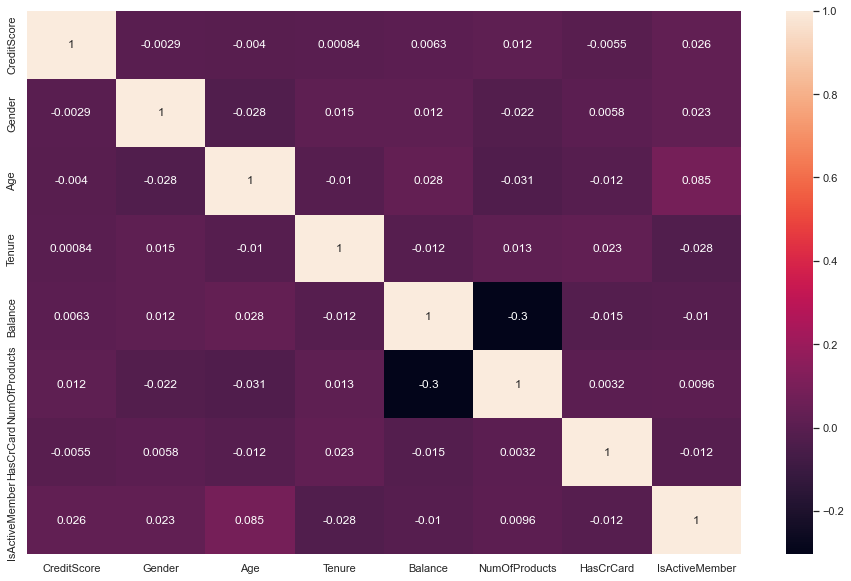

In [131]:

import seaborn as sns; sns.set_theme()
plt.figure(figsize=(16,10))

ax = sns.heatmap(x.corr(), annot=True)
